In [1]:
import geopandas as gpd
from pathlib import Path
import pandas as pd

# Setup

Create the output directory

In [2]:
out_dir = Path('out')
out_dir.mkdir(exist_ok=True)

Read the dataframe

In [3]:
df_dswx = gpd.read_file('dswx_metadata_linked_with_hls.geojson')
df_dswx.head()

,granule_id,time_acquired,time_updated,B01_WTR_link,time_acq_str,mgrs_tile_id,accode,aerosol_class_remapping_enabled,aerosol_not_water_to_high_conf_water_fmask_values,aerosol_partial_surface_aggressive_to_high_conf_water_fmask_values,...,landsat_product_id_hls,landsat_scene_id_hls,processing_level_hls,sensor_hls,sentinel2_tileid_hls,tirs_ssm_model_hls,tirs_ssm_position_status_hls,usgs_software_hls,hls_url_B04,geometry
0,OPERA_L3_DSWx-HLS_T25MER_20230504T123259Z_2023...,2023-05-04T12:33:08.845000+00:00,2023-05-06T16:51:17.371000+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T123259Z,T25MER,LaSRC,TRUE,"224,160,96","224,192,160,128,96",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((-32.01000 -4.52400, -32.01000 -3.530..."
1,OPERA_L3_DSWx-HLS_T42XVQ_20230504T125639Z_2023...,2023-05-04T12:56:39.187000+00:00,2023-05-06T08:15:15.550000+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T125639Z,T42XVQ,Lasrc,TRUE,"224,160,96","224,192,160,128,96",...,LC08_L1TP_207244_20230504_20230504_02_RT,LC82072442023124LGN00,L1TP,OLI_TIRS,42XVQ,PRELIMINARY,ESTIMATED,LPGS_16.2.0,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((69.57000 80.12500, 69.57000 81.14800..."
2,OPERA_L3_DSWx-HLS_T41XNK_20230504T125639Z_2023...,2023-05-04T12:56:39.187000+00:00,2023-05-06T08:15:16.575001+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T125639Z,T41XNK,Lasrc,TRUE,"224,160,96","224,192,160,128,96",...,LC08_L1TP_207244_20230504_20230504_02_RT,LC82072442023124LGN00,L1TP,OLI_TIRS,41XNK,PRELIMINARY,ESTIMATED,LPGS_16.2.0,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((69.36600 80.11600, 69.36600 81.14900..."
3,OPERA_L3_DSWx-HLS_T42XVR_20230504T125639Z_2023...,2023-05-04T12:56:39.187000+00:00,2023-05-08T02:12:16.707001+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T125639Z,T42XVR,Lasrc,TRUE,"224,160,96","224,192,160,128,96",...,LC08_L1TP_207244_20230504_20230504_02_RT,LC82072442023124LGN00,L1TP,OLI_TIRS,42XVR,PRELIMINARY,ESTIMATED,LPGS_16.2.0,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((69.63400 81.01600, 69.63400 82.04400..."
4,OPERA_L3_DSWx-HLS_T40XER_20230504T125639Z_2023...,2023-05-04T12:56:39.187000+00:00,2023-05-08T02:13:14.809000+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T125639Z,T40XER,Lasrc,TRUE,"224,160,96","224,192,160,128,96",...,LC08_L1TP_207244_20230504_20230504_02_RT,LC82072442023124LGN00,L1TP,OLI_TIRS,40XER,PRELIMINARY,ESTIMATED,LPGS_16.2.0,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((64.07000 81.00700, 64.07000 82.04500..."


In [48]:
%%time

df_dswx['time_acquired'] = df_dswx['time_acquired'].map(pd.to_datetime)
df_dswx['time_updated'] = df_dswx['time_updated'].map(pd.to_datetime)

Make columns for comparing SAFE files used as inputs.

In [4]:
f'Total DSWx products considered: {df_dswx.shape[0]}'

'Total DSWx products considered: 50596'

In [5]:
df_dswx.columns.tolist()

['granule_id',
 'time_acquired',
 'time_updated',
 'B01_WTR_link',
 'time_acq_str',
 'mgrs_tile_id',
 'accode',
 'aerosol_class_remapping_enabled',
 'aerosol_not_water_to_high_conf_water_fmask_values',
 'aerosol_partial_surface_aggressive_to_high_conf_water_fmask_values',
 'aerosol_partial_surface_water_conservative_to_high_conf_water_fmask_values',
 'aerosol_water_moderate_conf_to_high_conf_water_fmask_values',
 'area_or_point',
 'cloud_coverage',
 'dem_coverage',
 'dem_source',
 'forest_mask_landcover_classes',
 'hls_dataset',
 'input_hls_product_cloud_coverage',
 'input_hls_product_spatial_coverage',
 'landcover_coverage',
 'landcover_source',
 'mask_adjacent_to_cloud_mode',
 'max_sun_local_inc_angle',
 'mean_sun_azimuth_angle',
 'mean_sun_zenith_angle',
 'mean_view_azimuth_angle',
 'mean_view_zenith_angle',
 'min_slope_angle',
 'nbar_solar_zenith',
 'ocean_masking_enabled',
 'ocean_masking_shoreline_distance_km',
 'processing_datetime',
 'product_id',
 'product_level',
 'product_so

In [6]:
df_dswx.iloc[:1].to_dict('records')

[{'granule_id': 'OPERA_L3_DSWx-HLS_T25MER_20230504T123259Z_20230506T164750Z_S2B_30_v1.0',
  'time_acquired': '2023-05-04T12:33:08.845000+00:00',
  'time_updated': '2023-05-06T16:51:17.371000+00:00',
  'B01_WTR_link': 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T25MER_20230504T123259Z_20230506T164750Z_S2B_30_v1.0_B01_WTR.tif',
  'time_acq_str': '20230504T123259Z',
  'mgrs_tile_id': 'T25MER',
  'accode': 'LaSRC',
  'aerosol_class_remapping_enabled': 'TRUE',
  'aerosol_not_water_to_high_conf_water_fmask_values': '224,160,96',
  'aerosol_partial_surface_aggressive_to_high_conf_water_fmask_values': '224,192,160,128,96',
  'aerosol_partial_surface_water_conservative_to_high_conf_water_fmask_values': '224,192,160,128,96',
  'aerosol_water_moderate_conf_to_high_conf_water_fmask_values': '224,160,96',
  'area_or_point': 'Area',
  'cloud_coverage': '12',
  'dem_coverage': 'FULL',
  'dem_source': 'Digital Elevation Mod

In [7]:
def length(item):
    if isinstance(item, str):
        return len(item)
    else:
        return 0

df_dswx['input_hls_safe_files_str_len'] = df_dswx.product_uri_hls.map(length)
df_dswx['dswx_safe_files_str_len'] = df_dswx.sensor_product_id.map(length)

df_dswx['input_hls_safe_files'] = df_dswx.product_uri_hls
df_dswx['dswx_safe_files'] = df_dswx.sensor_product_id

# Sentinel-2 Safe file Inspection

In [8]:
cond_0 = ~df_dswx.product_uri_hls.isnull()
df_temp = df_dswx[cond_0]

cond_1 = df_temp.product_uri_hls != df_temp.sensor_product_id
df_s2_missing = df_temp[cond_1].reset_index(drop=True)
df_s2_missing.shape

(204, 106)

In [9]:
df_s2_missing.to_dict('records')[0]

{'granule_id': 'OPERA_L3_DSWx-HLS_T22JDL_20230504T132231Z_20230506T103118Z_S2A_30_v1.0',
 'time_acquired': '2023-05-04T13:31:05.936000+00:00',
 'time_updated': '2023-05-06T10:34:20.990000+00:00',
 'B01_WTR_link': 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T22JDL_20230504T132231Z_20230506T103118Z_S2A_30_v1.0_B01_WTR.tif',
 'time_acq_str': '20230504T132231Z',
 'mgrs_tile_id': 'T22JDL',
 'accode': 'LaSRC + LaSRC',
 'aerosol_class_remapping_enabled': 'TRUE',
 'aerosol_not_water_to_high_conf_water_fmask_values': '224,160,96',
 'aerosol_partial_surface_aggressive_to_high_conf_water_fmask_values': '224,192,160,128,96',
 'aerosol_partial_surface_water_conservative_to_high_conf_water_fmask_values': '224,192,160,128,96',
 'aerosol_water_moderate_conf_to_high_conf_water_fmask_values': '224,160,96',
 'area_or_point': 'Area',
 'cloud_coverage': '99',
 'dem_coverage': 'FULL',
 'dem_source': 'Digital Elevation Model (DEM)

In [10]:
df_s2_missing.head()

,granule_id,time_acquired,time_updated,B01_WTR_link,time_acq_str,mgrs_tile_id,accode,aerosol_class_remapping_enabled,aerosol_not_water_to_high_conf_water_fmask_values,aerosol_partial_surface_aggressive_to_high_conf_water_fmask_values,...,sentinel2_tileid_hls,tirs_ssm_model_hls,tirs_ssm_position_status_hls,usgs_software_hls,hls_url_B04,geometry,input_hls_safe_files_str_len,dswx_safe_files_str_len,input_hls_safe_files,dswx_safe_files
0,OPERA_L3_DSWx-HLS_T22JDL_20230504T132231Z_2023...,2023-05-04T13:31:05.936000+00:00,2023-05-06T10:34:20.990000+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T132231Z,T22JDL,LaSRC + LaSRC,TRUE,"224,160,96","224,192,160,128,96",...,NaN,NaN,NaN,NaN,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((-50.89700 -31.63500, -50.89700 -30.6...",65,133,S2A_MSIL1C_20230504T132231_N0509_R038_T22JDL_2...,S2A_MSIL1C_20230504T132231_N0509_R038_T22JDL_2...
1,OPERA_L3_DSWx-HLS_T19MCP_20230504T145721Z_2023...,2023-05-04T15:04:35.867001+00:00,2023-05-06T10:16:19.027000+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T145721Z,T19MCP,LaSRC,TRUE,"224,160,96","224,192,160,128,96",...,NaN,NaN,NaN,NaN,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((-69.81400 -6.33200, -69.81400 -5.337...",133,65,S2A_MSIL1C_20230504T145721_N0509_R039_T19MCP_2...,S2A_MSIL1C_20230504T145721_N0509_R039_T19MCP_2...
2,OPERA_L3_DSWx-HLS_T19MBP_20230504T145721Z_2023...,2023-05-04T15:04:38.151001+00:00,2023-05-06T07:20:17.496000+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T145721Z,T19MBP,LaSRC + LaSRC,TRUE,"224,160,96","224,192,160,128,96",...,NaN,NaN,NaN,NaN,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((-70.71600 -6.33000, -70.71600 -5.334...",65,133,S2A_MSIL1C_20230504T145721_N0509_R039_T19MBP_2...,S2A_MSIL1C_20230504T145721_N0509_R039_T19MBP_2...
3,OPERA_L3_DSWx-HLS_T23XNC_20230504T152809Z_2023...,2023-05-04T15:31:45.963001+00:00,2023-05-06T07:18:21.216000+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T152809Z,T23XNC,LaSRC,TRUE,"224,160,96","224,192,160,128,96",...,NaN,NaN,NaN,NaN,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((-41.23500 73.86300, -41.23500 74.876...",133,65,S2B_MSIL1C_20230504T152809_N0509_R111_T23XNC_2...,S2B_MSIL1C_20230504T152809_N0509_R111_T23XNC_2...
4,OPERA_L3_DSWx-HLS_T20VNJ_20230504T153559Z_2023...,2023-05-04T15:36:53.073002+00:00,2023-05-06T07:18:16.962999+00:00,https://archive.podaac.earthdata.nasa.gov/poda...,20230504T153559Z,T20VNJ,LaSRC,TRUE,"224,160,96","224,192,160,128,96",...,NaN,NaN,NaN,NaN,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,"POLYGON ((-61.15200 56.83100, -61.15200 57.830...",133,65,S2B_MSIL1C_20230504T153559_N0509_R111_T20VNJ_2...,S2B_MSIL1C_20230504T153559_N0509_R111_T20VNJ_2...


In [11]:
hls_length_safe_str = df_s2_missing.product_uri_hls.map(len)
dswx_length_safe_str = df_s2_missing.sensor_product_id.map(len)
cond = hls_length_safe_str > dswx_length_safe_str
df_s2_missing[cond].shape

(176, 106)

In [12]:
df_s2_missing.to_dict('records')[0]

{'granule_id': 'OPERA_L3_DSWx-HLS_T22JDL_20230504T132231Z_20230506T103118Z_S2A_30_v1.0',
 'time_acquired': '2023-05-04T13:31:05.936000+00:00',
 'time_updated': '2023-05-06T10:34:20.990000+00:00',
 'B01_WTR_link': 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T22JDL_20230504T132231Z_20230506T103118Z_S2A_30_v1.0_B01_WTR.tif',
 'time_acq_str': '20230504T132231Z',
 'mgrs_tile_id': 'T22JDL',
 'accode': 'LaSRC + LaSRC',
 'aerosol_class_remapping_enabled': 'TRUE',
 'aerosol_not_water_to_high_conf_water_fmask_values': '224,160,96',
 'aerosol_partial_surface_aggressive_to_high_conf_water_fmask_values': '224,192,160,128,96',
 'aerosol_partial_surface_water_conservative_to_high_conf_water_fmask_values': '224,192,160,128,96',
 'aerosol_water_moderate_conf_to_high_conf_water_fmask_values': '224,160,96',
 'area_or_point': 'Area',
 'cloud_coverage': '99',
 'dem_coverage': 'FULL',
 'dem_source': 'Digital Elevation Model (DEM)

In [13]:
df_s2_missing[cond].to_dict('records')[0]

{'granule_id': 'OPERA_L3_DSWx-HLS_T19MCP_20230504T145721Z_20230506T101311Z_S2A_30_v1.0',
 'time_acquired': '2023-05-04T15:04:35.867001+00:00',
 'time_updated': '2023-05-06T10:16:19.027000+00:00',
 'B01_WTR_link': 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T19MCP_20230504T145721Z_20230506T101311Z_S2A_30_v1.0_B01_WTR.tif',
 'time_acq_str': '20230504T145721Z',
 'mgrs_tile_id': 'T19MCP',
 'accode': 'LaSRC',
 'aerosol_class_remapping_enabled': 'TRUE',
 'aerosol_not_water_to_high_conf_water_fmask_values': '224,160,96',
 'aerosol_partial_surface_aggressive_to_high_conf_water_fmask_values': '224,192,160,128,96',
 'aerosol_partial_surface_water_conservative_to_high_conf_water_fmask_values': '224,192,160,128,96',
 'aerosol_water_moderate_conf_to_high_conf_water_fmask_values': '224,160,96',
 'area_or_point': 'Area',
 'cloud_coverage': '99',
 'dem_coverage': 'FULL',
 'dem_source': 'Digital Elevation Model (DEM) for the

Serialize

In [14]:
s2_fname = 'sentinel-2-safe-issues'
df_s2_missing.to_file(out_dir / f'{s2_fname}.geojson', driver='GeoJSON')
df_s2_missing.to_csv(out_dir / f'{s2_fname}.csv')

# Spatial Coverage Metadata

In [15]:
df_spatial_coverage_diff = df_dswx[df_dswx.spatial_coverage != df_dswx.spatial_coverage_hls].reset_index(drop=True)
df_spatial_coverage_diff.shape

(8820, 106)

In [16]:
spatial_coverage_diff = pd.DataFrame(pd.to_numeric(df_spatial_coverage_diff.spatial_coverage) 
                                     - pd.to_numeric(df_spatial_coverage_diff.spatial_coverage_hls))
spatial_coverage_diff.describe()

,0
count,8820.000000
mean,-1.811451
std,7.960922
min,-100.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,97.000000


In [17]:
spatial_coverage_fname = 'spatial-coverage-issues-issues'
df_spatial_coverage_diff.to_file(out_dir / f'{spatial_coverage_fname}.geojson', driver='GeoJSON')
df_spatial_coverage_diff.to_csv(out_dir / f'{spatial_coverage_fname}.csv')

In [18]:
T = 20
cond = (abs(spatial_coverage_diff) >= 20).values
df_bad = df_spatial_coverage_diff[cond].reset_index(drop=True)
df_bad.shape

(129, 106)

In [19]:
bad_spatial_coverage_fname = f'spatial-coverage-issues-issues_geq_{T}_perc'
df_bad.to_file(out_dir / f'{bad_spatial_coverage_fname}.geojson', driver='GeoJSON')
df_bad.to_csv(out_dir / f'{bad_spatial_coverage_fname}.csv')

In [20]:
df_bad.to_dict('records')[:]

[{'granule_id': 'OPERA_L3_DSWx-HLS_T19MCP_20230504T145721Z_20230506T101311Z_S2A_30_v1.0',
  'time_acquired': '2023-05-04T15:04:35.867001+00:00',
  'time_updated': '2023-05-06T10:16:19.027000+00:00',
  'B01_WTR_link': 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T19MCP_20230504T145721Z_20230506T101311Z_S2A_30_v1.0_B01_WTR.tif',
  'time_acq_str': '20230504T145721Z',
  'mgrs_tile_id': 'T19MCP',
  'accode': 'LaSRC',
  'aerosol_class_remapping_enabled': 'TRUE',
  'aerosol_not_water_to_high_conf_water_fmask_values': '224,160,96',
  'aerosol_partial_surface_aggressive_to_high_conf_water_fmask_values': '224,192,160,128,96',
  'aerosol_partial_surface_water_conservative_to_high_conf_water_fmask_values': '224,192,160,128,96',
  'aerosol_water_moderate_conf_to_high_conf_water_fmask_values': '224,160,96',
  'area_or_point': 'Area',
  'cloud_coverage': '99',
  'dem_coverage': 'FULL',
  'dem_source': 'Digital Elevation Mod

They all are from sentinel-2.

In [21]:
df_bad.granule_id.map(lambda x: x.split('_')[6][:2] != 'S2').sum()

0

All the differences of spatial have different number of SAFE files.

In [22]:
(df_bad.dswx_safe_files_str_len == df_bad.input_hls_safe_files).sum()

0

# Update Time vs. Acquisition Time

In [51]:
def check_safe_files_all(row):
    if isinstance(row['product_uri_hls'], float):
        return False
    else:
        return row['product_uri_hls'] != row['sensor_product_id']

In [52]:
%%time

cond = df_dswx.agg(check_safe_files_all, axis=1)
cond.sum()

CPU times: user 4.08 s, sys: 490 ms, total: 4.57 s
Wall time: 35.3 s


204

This is the same size as above.

In [37]:
df_dswx['input_sensor_name'] = df_dswx.granule_id.map(lambda granule_id: granule_id.split('_')[-3])
df_dswx['input_sensor_name'].unique()

array(['S2B', 'L8', 'S2A'], dtype=object)

Analysis:

In [57]:
df_dswx_ok = df_dswx[df_dswx['input_sensor_name'].isin(['S2A', 'S2B']) & (~cond)].reset_index(drop=True)

In [58]:
df_dswx_not_ok = df_dswx[cond].reset_index(drop=True)

In [80]:
%%time

lag_bad = (df_dswx_not_ok.time_updated - df_dswx_not_ok.hls_processing_time_hls).dt.total_seconds()
lag_ok = (df_dswx_ok.time_updated - df_dswx_ok.hls_processing_time_hls).dt.total_seconds()

CPU times: user 2.31 ms, sys: 997 µs, total: 3.3 ms
Wall time: 2.97 ms


In [81]:
import matplotlib.pyplot as plt

In [82]:
lag_bad_h = lag_bad / 60 / 60
lag_ok_h = lag_ok / 60 / 60

m0 = min(lag_bad_h.min(), lag_ok_h.min())
m1 = max(lag_bad_h.max(), lag_ok_h.max())
m0, m1

(-8.165231666666665, 66.99878472222223)

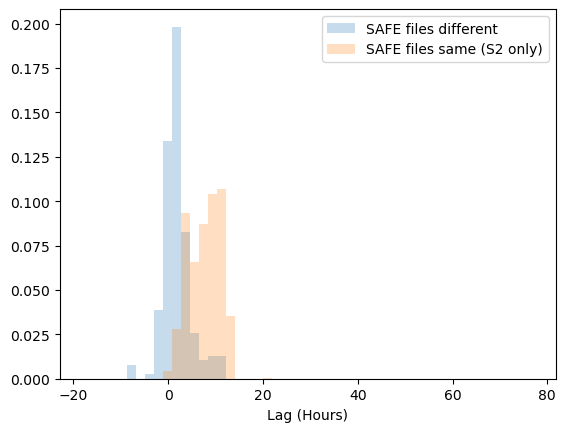

In [84]:
fig, ax = plt.subplots()
ax.hist(lag_bad / 60 / 60, label='SAFE files different', alpha=.25, density=True, bins=50, range=(m0 - 10, m1 + 10))
ax.hist(lag_ok / 60 / 60, label='SAFE files same (S2 only)', alpha=.25, density=True, bins=50, range=(m0 - 10, m1 + 10))
ax.set_xlabel('Lag (Hours)')
plt.legend()